# IMPORT LIBRARY

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SET INPUT PARAMETERS

In [2]:
ITERATIONS = 100000
MAX_NUMBER_OF_NEUTRONS_AT_A_NODE_GENERATED = 3
# NUMBER_OF_GENERATION = 3
NUMBER_OF_GENERATION_RANGE = [1, 2, 3]

NUMBER__OF_NEUTRONS_FOR_RESULT = [0, 1, 2, 3, 4]

# PLOT BAR CHART FUNCTION

In [3]:
def plotBarChart(x, y, color="r", title="", xlabel="", ylabel=""):
    plt.bar(x, y, align='center', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

mapping = {}
mapping[1]= "st"
mapping[2]= "nd"
mapping[3]= "rd"
mapping[4]= "th"

# SET PROBABILITIES

In [4]:
p0 = 0.4825
def get_pi(i):
    if i==0:
        return p0    
    p = 0.2126 * (0.5893 ** (i-1))
    return p

In [5]:
def get_probability(n):
    probabilities = []
    for i in range(n+1):
        probabilities.append(get_pi(i))
    
    sum_prob = sum(probabilities)
    if sum_prob > 1:
        print('Error: sum of probabilities is greater than 1')
        exit(1)
    elif sum_prob < 1:
        add_prob = 1 - sum_prob
        probabilities[0] = probabilities[0] + add_prob
    
    probabilities = np.array(probabilities)
    return probabilities

In [6]:
def get_cumulative_probability(n):
    probabilities = get_probability(n)
    # print(probabilities)
    cum_prob = np.cumsum(probabilities)
    return cum_prob

# NODE CLASS

In [7]:
class Node:
    def __init__(self, parent, depth, isRoot=False):
        self.isRoot = isRoot
        self.isLeaf = True
        self.number_of_children = 0
        self.parent = parent
        self.depth = depth
        self.children = []
    
    def __str__(self):
        return f"(children: {self.number_of_children}, depth: {self.depth})"
    
    def add_child(self, child):
        self.children.append(child)
        self.number_of_children += 1
        self.isLeaf = False
    

# NON BINARY TREE Data Structure

In [8]:
class Non_Binary_Tree:
    def __init__(self):
        self.root = Node(None, 0, isRoot=True)
        self.nodes = []
        self.tree_depth = 0
    
    def add_nodes(self, parent_node, n):
        if n != 0:
            for i in range(n):
                node = Node(parent_node, depth=parent_node.depth+1)
                parent_node.add_child(node)
            
            if parent_node.depth+1 > self.tree_depth:
                self.tree_depth = parent_node.depth+1
        else:
            # print('number of nodes to add is 0')
            return
    # count number of nodes at depth using DFS
    def DFS(self, node, depth, count):
        if node.depth == depth:
            count += 1
        for child in node.children:
            count = self.DFS(child, depth, count)
        return count

    def DFS_nodes(self, node, depth, nodes):
        if node.depth == depth:
            nodes.append(node)
        for child in node.children:
            nodes = self.DFS_nodes(child, depth, nodes)
        return nodes
    
    def get_nodes_at_depth(self, depth):
        nodes = []
        nodes = self.DFS_nodes(self.root, depth, nodes)
        return nodes

    def get_nodes_number_at_depth(self, depth):
        count = 0
        count = self.DFS(self.root, depth, count)
        return count
    
    def print_list(self, list):
        for i in list:
            print(i)

    def print_tree(self):
        print(f"Tree depth: {self.tree_depth}")
        for i in range(self.tree_depth+1):
            nodes = self.get_nodes_at_depth(i)
            print(f"Depth: {i} len : {len(nodes)} Nodes:")
            self.print_list(nodes)

# Neutrons Class

In [9]:
class Neutrons:
    def __init__(self, max_neutrons_at_a_node=3, num_of_generation=2):
        self.max_neutrons_at_a_node = max_neutrons_at_a_node
        self.num_of_generation = num_of_generation
        self.cumulative_probabilities = get_cumulative_probability(max_neutrons_at_a_node)

    def get_generated_neutrons_number(self):
        prob = np.random.uniform(0, 1)
        neutrons = 0
        for i in range(len(self.cumulative_probabilities)):
            if prob <= self.cumulative_probabilities[i]:
                neutrons = i
                break
        return neutrons

    def generate_tree(self):
        tree = Non_Binary_Tree()
        root = tree.root

        for i in range(self.num_of_generation):
            nodes_at_depth = tree.get_nodes_at_depth(i)
            for j in nodes_at_depth:
                neutrons = self.get_generated_neutrons_number()
                tree.add_nodes(j, neutrons)
        self.tree = tree
        return tree
    
    def get_number_of_nodes(self, generation_number):
        if self.tree.tree_depth < generation_number:
            # print("tree depth less than generation number")
            return 0
        return self.tree.get_nodes_number_at_depth(generation_number)


In [10]:
# print cumalative probabilities
prob = get_probability(MAX_NUMBER_OF_NEUTRONS_AT_A_NODE_GENERATED)
cum_prob = get_cumulative_probability(MAX_NUMBER_OF_NEUTRONS_AT_A_NODE_GENERATED)
for i in range(len(cum_prob)):
    print(f"probability of {i}th neutron: {prob[i]}, cumulative probability: {cum_prob[i]}")

probability of 0th neutron: 0.5882842634259999, cumulative probability: 0.5882842634259999
probability of 1th neutron: 0.2126, cumulative probability: 0.8008842634259999
probability of 2th neutron: 0.12528518000000002, cumulative probability: 0.9261694434259999
probability of 3th neutron: 0.07383055657400002, cumulative probability: 1.0


# RUN SIMULATION

Number of generation: 1
Probability of 0 neutrons at 1st generation: 0.58716
Probability of 1 neutrons at 1st generation: 0.21205
Probability of 2 neutrons at 1st generation: 0.1265
Probability of 3 neutrons at 1st generation: 0.07429
Probability of 4 neutrons at 1st generation: 0.0




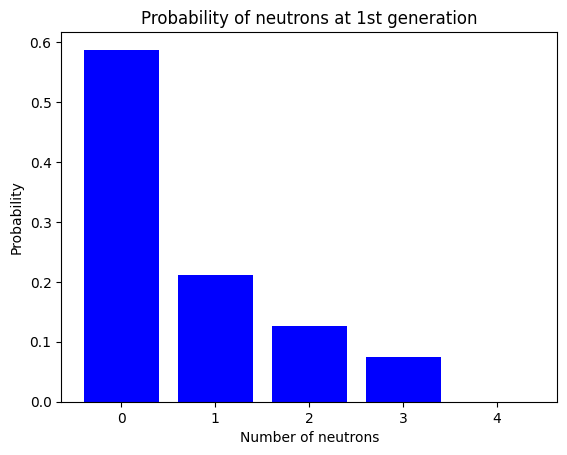

Number of generation: 2
Probability of 0 neutrons at 2nd generation: 0.7703
Probability of 1 neutrons at 2nd generation: 0.09336
Probability of 2 neutrons at 2nd generation: 0.06636
Probability of 3 neutrons at 2nd generation: 0.04711
Probability of 4 neutrons at 2nd generation: 0.01329




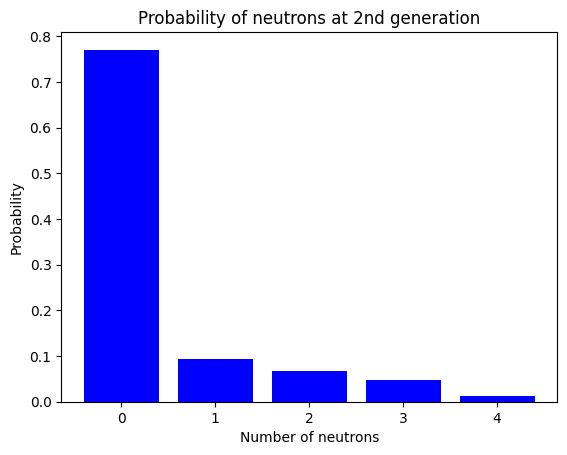

Number of generation: 3
Probability of 0 neutrons at 3rd generation: 0.86179
Probability of 1 neutrons at 3rd generation: 0.04942
Probability of 2 neutrons at 3rd generation: 0.03765
Probability of 3 neutrons at 3rd generation: 0.02896
Probability of 4 neutrons at 3rd generation: 0.01115




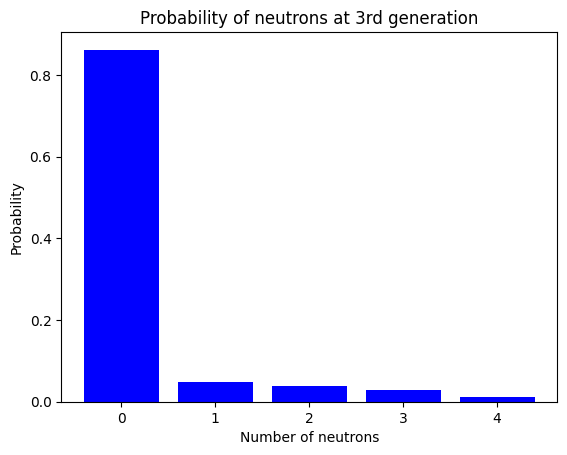

In [11]:
for NUMBER_OF_GENERATION in NUMBER_OF_GENERATION_RANGE:
    count_map ={}
    for i in NUMBER__OF_NEUTRONS_FOR_RESULT:
        count_map[i] = 0

    for i in range(ITERATIONS):
        neutrons = Neutrons(MAX_NUMBER_OF_NEUTRONS_AT_A_NODE_GENERATED, NUMBER_OF_GENERATION)
        tree = neutrons.generate_tree()
        # tree.print_tree()
        num_neutrons_at_Nth_gen = neutrons.get_number_of_nodes(NUMBER_OF_GENERATION)
        
        if num_neutrons_at_Nth_gen in NUMBER__OF_NEUTRONS_FOR_RESULT:
            count_map[num_neutrons_at_Nth_gen] += 1
    # calculate probability
    result = {}
    print(f"Number of generation: {NUMBER_OF_GENERATION}")
    if NUMBER_OF_GENERATION <=3:
        gen_num = f"{NUMBER_OF_GENERATION}{mapping[NUMBER_OF_GENERATION]}"
    else :
        gen_num = f"{NUMBER_OF_GENERATION}{mapping[4]}"

    for i in NUMBER__OF_NEUTRONS_FOR_RESULT:
        result[i] = count_map[i]/ITERATIONS
        print(f"Probability of {i} neutrons at {gen_num} generation: {count_map[i]/ITERATIONS}")
    print("\n")
    # plot bar chart    
    plotBarChart(result.keys(), result.values(), color='b', title=f"Probability of neutrons at {gen_num} generation", xlabel="Number of neutrons", ylabel="Probability")